In [18]:
# Import libraries
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Function to clean NaN and infinite values
def clean_data(X_train, X_valid, X_test):
    X_train.fillna(X_train.mean(), inplace=True)
    X_valid.fillna(X_valid.mean(), inplace=True)
    X_test.fillna(X_test.mean(), inplace=True)
    return X_train, X_valid, X_test

In [20]:
# Load data
data_train = pd.read_pickle("clean_data/train/all_data_train.pkl")
data_valid = pd.read_pickle("clean_data/valid/all_data_valid.pkl")
data_test = pd.read_pickle("clean_data/test/all_data_test.pkl")

In [21]:
# Split the data into features (X) and target (y)
X_train = data_train.drop("class", axis=1)
X_valid = data_valid.drop("class", axis=1)
X_test = data_test.drop("class", axis=1)

y_train = data_train["class"]
y_valid = data_valid["class"]
y_test = data_test["class"]

In [22]:
# Encode the target variable (multi-class encoding)
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
encoded_y_valid = encoder.transform(y_valid)
encoded_y_test = encoder.transform(y_test)

# Clean the data (replace NaNs and infinities)
X_train, X_valid, X_test = clean_data(X_train, X_valid, X_test)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [23]:
# Function to build a model with variable layers and neurons
def build_gru_model(num_neurons, num_layers, input_shape):
    model = Sequential()
    for _ in range(num_layers):
        model.add(GRU(num_neurons, return_sequences=True, input_shape=input_shape))
        model.add(Dropout(0.2))  # Add dropout for regularization
    model.add(GRU(num_neurons))  # Last layer without return_sequences
    model.add(
        Dense(4, activation="softmax")
    )  # 4 classes for multi-class classification
    model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return model

In [24]:
# Check and adjust the window length based on the number of features
def adjust_window_length(X, window_length):
    num_features = X.shape[1]

    # Ensure the window length does not exceed the number of features
    if window_length > num_features:
        print(
            f"Window length {window_length} is too large for {num_features} features. Adjusting window length."
        )
        window_length = num_features

    if num_features % window_length != 0:
        # Adjust window length to fit the number of features
        new_window_length = num_features // (num_features // window_length)
        print(f"Adjusted window length from {window_length} to {new_window_length}")
        return new_window_length

    return window_length

Epoch 1/35
1198/1198 [==============================] - 22s 14ms/step - loss: 0.6154 - accuracy: 0.7583 - val_loss: 0.3081 - val_accuracy: 0.8863
Epoch 2/35
1198/1198 [==============================] - 10s 9ms/step - loss: 0.3292 - accuracy: 0.8751 - val_loss: 0.2648 - val_accuracy: 0.9034
Epoch 3/35
1198/1198 [==============================] - 11s 9ms/step - loss: 0.2912 - accuracy: 0.8875 - val_loss: 0.2624 - val_accuracy: 0.9039
Epoch 4/35
1198/1198 [==============================] - 10s 8ms/step - loss: 0.2662 - accuracy: 0.8967 - val_loss: 0.2404 - val_accuracy: 0.9181
Epoch 5/35
1198/1198 [==============================] - 7s 6ms/step - loss: 0.2483 - accuracy: 0.9064 - val_loss: 0.2282 - val_accuracy: 0.9194
Epoch 6/35
1198/1198 [==============================] - 7s 6ms/step - loss: 0.2307 - accuracy: 0.9133 - val_loss: 0.2139 - val_accuracy: 0.9269
Epoch 7/35
1198/1198 [==============================] - 6s 5ms/step - loss: 0.2235 - accuracy: 0.9142 - val_loss: 0.2099 - val_accu

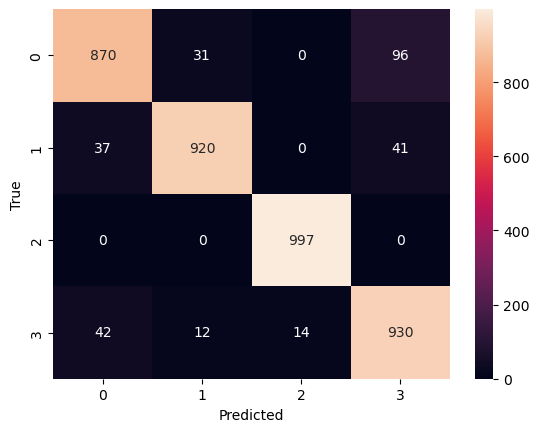

Epoch 1/35
1198/1198 [==============================] - 24s 13ms/step - loss: 0.6013 - accuracy: 0.7626 - val_loss: 0.3096 - val_accuracy: 0.8881
Epoch 2/35
1198/1198 [==============================] - 12s 10ms/step - loss: 0.3443 - accuracy: 0.8714 - val_loss: 0.2731 - val_accuracy: 0.8983
Epoch 3/35
1198/1198 [==============================] - 12s 10ms/step - loss: 0.3061 - accuracy: 0.8805 - val_loss: 0.2513 - val_accuracy: 0.9091
Epoch 4/35
1198/1198 [==============================] - 11s 9ms/step - loss: 0.2823 - accuracy: 0.8920 - val_loss: 0.2339 - val_accuracy: 0.9161
Epoch 5/35
1198/1198 [==============================] - 11s 9ms/step - loss: 0.2686 - accuracy: 0.8964 - val_loss: 0.2281 - val_accuracy: 0.9156
Epoch 6/35
1198/1198 [==============================] - 11s 9ms/step - loss: 0.2542 - accuracy: 0.9032 - val_loss: 0.2359 - val_accuracy: 0.9154
Epoch 7/35
1198/1198 [==============================] - 11s 10ms/step - loss: 0.2404 - accuracy: 0.9093 - val_loss: 0.2148 - va

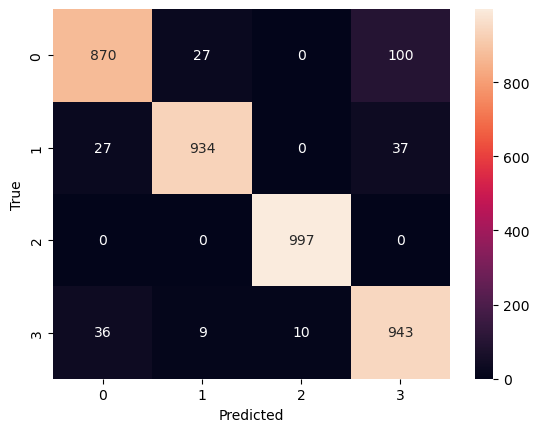

Epoch 1/35
1198/1198 [==============================] - 15s 9ms/step - loss: 0.5200 - accuracy: 0.7991 - val_loss: 0.2684 - val_accuracy: 0.9046
Epoch 2/35
1198/1198 [==============================] - 8s 7ms/step - loss: 0.2803 - accuracy: 0.8933 - val_loss: 0.2433 - val_accuracy: 0.9084
Epoch 3/35
1198/1198 [==============================] - 7s 6ms/step - loss: 0.2427 - accuracy: 0.9065 - val_loss: 0.2204 - val_accuracy: 0.9159
Epoch 4/35
1198/1198 [==============================] - 8s 7ms/step - loss: 0.2194 - accuracy: 0.9150 - val_loss: 0.2085 - val_accuracy: 0.9239
Epoch 5/35
1198/1198 [==============================] - 10s 8ms/step - loss: 0.2029 - accuracy: 0.9247 - val_loss: 0.2045 - val_accuracy: 0.9279
Epoch 6/35
1198/1198 [==============================] - 7s 6ms/step - loss: 0.1890 - accuracy: 0.9311 - val_loss: 0.1879 - val_accuracy: 0.9369
Epoch 7/35
1198/1198 [==============================] - 7s 6ms/step - loss: 0.1770 - accuracy: 0.9330 - val_loss: 0.2010 - val_accurac

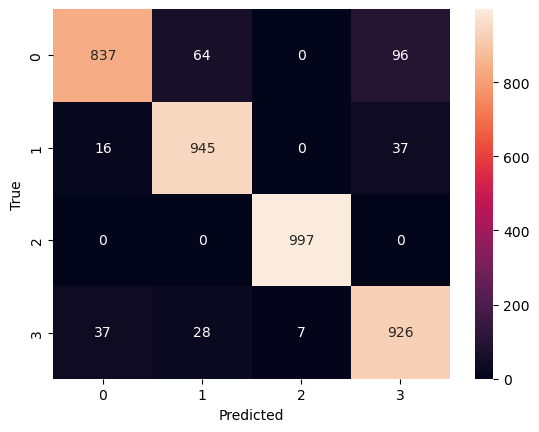

Epoch 1/35
1198/1198 [==============================] - 19s 10ms/step - loss: 0.5141 - accuracy: 0.7979 - val_loss: 0.2779 - val_accuracy: 0.8953
Epoch 2/35
1198/1198 [==============================] - 10s 8ms/step - loss: 0.3005 - accuracy: 0.8859 - val_loss: 0.2405 - val_accuracy: 0.9114
Epoch 3/35
1198/1198 [==============================] - 10s 8ms/step - loss: 0.2584 - accuracy: 0.9002 - val_loss: 0.2274 - val_accuracy: 0.9114
Epoch 4/35
1198/1198 [==============================] - 10s 8ms/step - loss: 0.2365 - accuracy: 0.9076 - val_loss: 0.2162 - val_accuracy: 0.9216
Epoch 5/35
1198/1198 [==============================] - 10s 8ms/step - loss: 0.2236 - accuracy: 0.9138 - val_loss: 0.1996 - val_accuracy: 0.9289
Epoch 6/35
1198/1198 [==============================] - 11s 10ms/step - loss: 0.2064 - accuracy: 0.9203 - val_loss: 0.2241 - val_accuracy: 0.9236
Epoch 7/35
1198/1198 [==============================] - 10s 9ms/step - loss: 0.1992 - accuracy: 0.9233 - val_loss: 0.2200 - val_

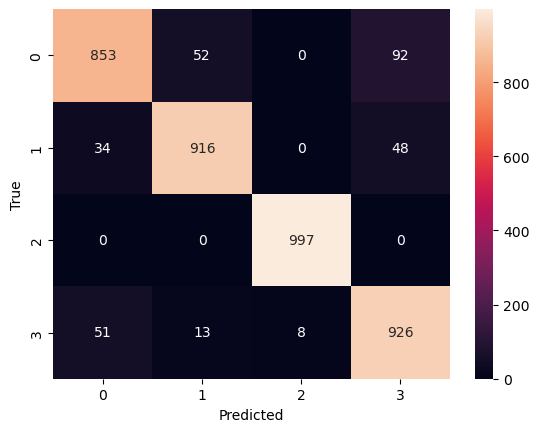

Epoch 1/35
1198/1198 [==============================] - 19s 8ms/step - loss: 0.4629 - accuracy: 0.8156 - val_loss: 0.2817 - val_accuracy: 0.9011
Epoch 2/35
1198/1198 [==============================] - 9s 8ms/step - loss: 0.2658 - accuracy: 0.8954 - val_loss: 0.2425 - val_accuracy: 0.9084
Epoch 3/35
1198/1198 [==============================] - 9s 7ms/step - loss: 0.2279 - accuracy: 0.9107 - val_loss: 0.2171 - val_accuracy: 0.9224
Epoch 4/35
1198/1198 [==============================] - 11s 9ms/step - loss: 0.1975 - accuracy: 0.9239 - val_loss: 0.1968 - val_accuracy: 0.9319
Epoch 5/35
1198/1198 [==============================] - 10s 9ms/step - loss: 0.1790 - accuracy: 0.9314 - val_loss: 0.2046 - val_accuracy: 0.9309
Epoch 6/35
1198/1198 [==============================] - 10s 8ms/step - loss: 0.1628 - accuracy: 0.9378 - val_loss: 0.1934 - val_accuracy: 0.9316
Epoch 7/35
1198/1198 [==============================] - 11s 9ms/step - loss: 0.1557 - accuracy: 0.9402 - val_loss: 0.1916 - val_accu

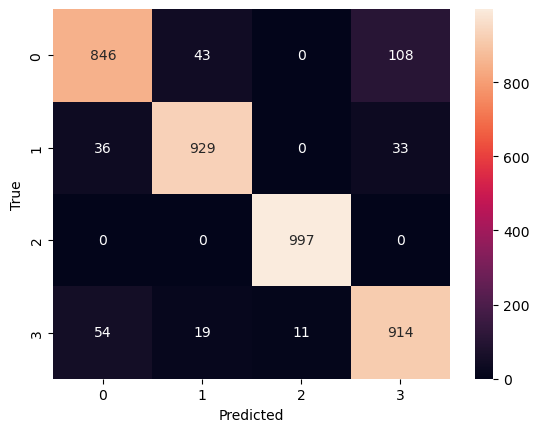

Epoch 1/35
1198/1198 [==============================] - 22s 12ms/step - loss: 0.4782 - accuracy: 0.8089 - val_loss: 0.2906 - val_accuracy: 0.8951
Epoch 2/35
1198/1198 [==============================] - 18s 15ms/step - loss: 0.2910 - accuracy: 0.8858 - val_loss: 0.2333 - val_accuracy: 0.9131
Epoch 3/35
1198/1198 [==============================] - 16s 14ms/step - loss: 0.2539 - accuracy: 0.8999 - val_loss: 0.2450 - val_accuracy: 0.9096
Epoch 4/35
1198/1198 [==============================] - 15s 12ms/step - loss: 0.2218 - accuracy: 0.9148 - val_loss: 0.2233 - val_accuracy: 0.9229
Epoch 5/35
1198/1198 [==============================] - 13s 11ms/step - loss: 0.2047 - accuracy: 0.9240 - val_loss: 0.2225 - val_accuracy: 0.9211
Epoch 6/35
1198/1198 [==============================] - 12s 10ms/step - loss: 0.1865 - accuracy: 0.9290 - val_loss: 0.2478 - val_accuracy: 0.9236
Epoch 7/35
1198/1198 [==============================] - 12s 10ms/step - loss: 0.1782 - accuracy: 0.9333 - val_loss: 0.2142 -

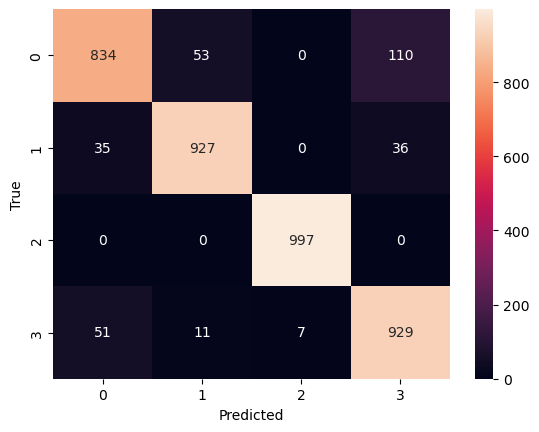

Adjusted window length from 4 to 6
Epoch 1/35
1198/1198 [==============================] - 19s 12ms/step - loss: 0.6421 - accuracy: 0.7255 - val_loss: 0.4018 - val_accuracy: 0.8443
Epoch 2/35
1198/1198 [==============================] - 13s 11ms/step - loss: 0.4197 - accuracy: 0.8345 - val_loss: 0.3346 - val_accuracy: 0.8668
Epoch 3/35
1198/1198 [==============================] - 14s 12ms/step - loss: 0.3408 - accuracy: 0.8674 - val_loss: 0.2867 - val_accuracy: 0.8921
Epoch 4/35
1198/1198 [==============================] - 16s 13ms/step - loss: 0.2984 - accuracy: 0.8858 - val_loss: 0.2695 - val_accuracy: 0.9039
Epoch 5/35
1198/1198 [==============================] - 15s 12ms/step - loss: 0.2679 - accuracy: 0.9000 - val_loss: 0.2419 - val_accuracy: 0.9151
Epoch 6/35
1198/1198 [==============================] - 12s 10ms/step - loss: 0.2484 - accuracy: 0.9058 - val_loss: 0.2355 - val_accuracy: 0.9161
Epoch 7/35
1198/1198 [==============================] - 11s 9ms/step - loss: 0.2315 - acc

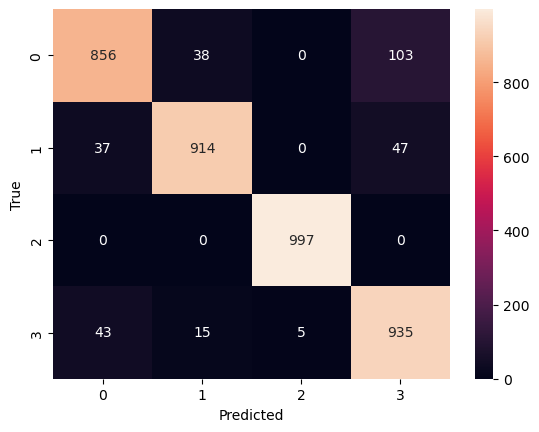

Epoch 1/35
1198/1198 [==============================] - 34s 18ms/step - loss: 0.6271 - accuracy: 0.7259 - val_loss: 0.3980 - val_accuracy: 0.8343
Epoch 2/35
1198/1198 [==============================] - 18s 15ms/step - loss: 0.4077 - accuracy: 0.8374 - val_loss: 0.3378 - val_accuracy: 0.8771
Epoch 3/35
1198/1198 [==============================] - 17s 14ms/step - loss: 0.3343 - accuracy: 0.8704 - val_loss: 0.2870 - val_accuracy: 0.8928
Epoch 4/35
1198/1198 [==============================] - 17s 14ms/step - loss: 0.2984 - accuracy: 0.8863 - val_loss: 0.2636 - val_accuracy: 0.9026
Epoch 5/35
1198/1198 [==============================] - 15s 12ms/step - loss: 0.2717 - accuracy: 0.8972 - val_loss: 0.2508 - val_accuracy: 0.9139
Epoch 6/35
1198/1198 [==============================] - 15s 13ms/step - loss: 0.2560 - accuracy: 0.9017 - val_loss: 0.2391 - val_accuracy: 0.9111
Epoch 7/35
1198/1198 [==============================] - 16s 13ms/step - loss: 0.2383 - accuracy: 0.9100 - val_loss: 0.2268 -

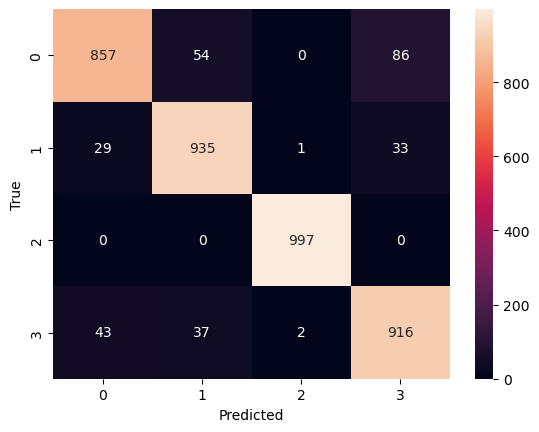

Epoch 1/35
1198/1198 [==============================] - 17s 10ms/step - loss: 0.5609 - accuracy: 0.7663 - val_loss: 0.3428 - val_accuracy: 0.8678
Epoch 2/35
1198/1198 [==============================] - 11s 9ms/step - loss: 0.3294 - accuracy: 0.8712 - val_loss: 0.2742 - val_accuracy: 0.9024
Epoch 3/35
1198/1198 [==============================] - 11s 9ms/step - loss: 0.2735 - accuracy: 0.8978 - val_loss: 0.2402 - val_accuracy: 0.9099
Epoch 4/35
1198/1198 [==============================] - 23s 19ms/step - loss: 0.2398 - accuracy: 0.9106 - val_loss: 0.2452 - val_accuracy: 0.9171
Epoch 5/35
1198/1198 [==============================] - 12s 10ms/step - loss: 0.2209 - accuracy: 0.9174 - val_loss: 0.2300 - val_accuracy: 0.9259
Epoch 6/35
1198/1198 [==============================] - 11s 9ms/step - loss: 0.2021 - accuracy: 0.9250 - val_loss: 0.2274 - val_accuracy: 0.9214
Epoch 7/35
1198/1198 [==============================] - 11s 9ms/step - loss: 0.1896 - accuracy: 0.9300 - val_loss: 0.2270 - val

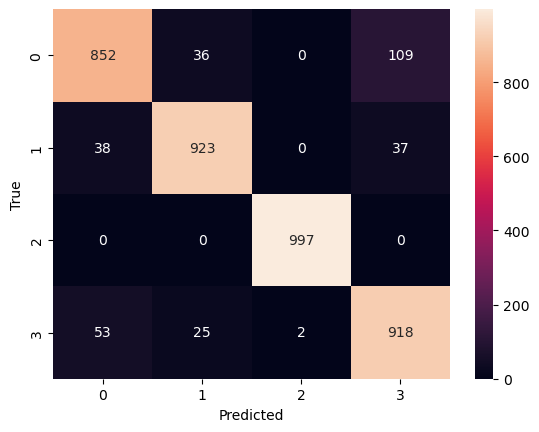

Epoch 1/35
1198/1198 [==============================] - 38s 21ms/step - loss: 0.5463 - accuracy: 0.7716 - val_loss: 0.3320 - val_accuracy: 0.8698
Epoch 2/35
1198/1198 [==============================] - 16s 13ms/step - loss: 0.3262 - accuracy: 0.8698 - val_loss: 0.2610 - val_accuracy: 0.9051
Epoch 3/35
1198/1198 [==============================] - 17s 14ms/step - loss: 0.2620 - accuracy: 0.8982 - val_loss: 0.2384 - val_accuracy: 0.9154
Epoch 4/35
1198/1198 [==============================] - 17s 14ms/step - loss: 0.2333 - accuracy: 0.9117 - val_loss: 0.2107 - val_accuracy: 0.9281
Epoch 5/35
1198/1198 [==============================] - 22s 18ms/step - loss: 0.2051 - accuracy: 0.9233 - val_loss: 0.2166 - val_accuracy: 0.9266
Epoch 6/35
1198/1198 [==============================] - 18s 15ms/step - loss: 0.1933 - accuracy: 0.9277 - val_loss: 0.2140 - val_accuracy: 0.9259
Epoch 7/35
1198/1198 [==============================] - 17s 14ms/step - loss: 0.1773 - accuracy: 0.9350 - val_loss: 0.2037 -

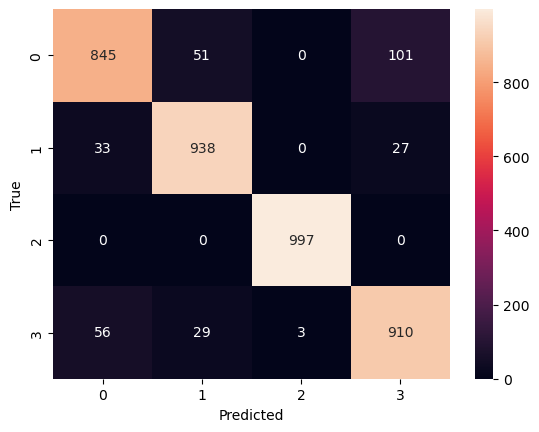

Epoch 1/35
1198/1198 [==============================] - 27s 17ms/step - loss: 0.5218 - accuracy: 0.7827 - val_loss: 0.3354 - val_accuracy: 0.8751
Epoch 2/35
1198/1198 [==============================] - 18s 15ms/step - loss: 0.2967 - accuracy: 0.8855 - val_loss: 0.2442 - val_accuracy: 0.9069
Epoch 3/35
1198/1198 [==============================] - 18s 15ms/step - loss: 0.2355 - accuracy: 0.9112 - val_loss: 0.2705 - val_accuracy: 0.9024
Epoch 4/35
1198/1198 [==============================] - 18s 15ms/step - loss: 0.2066 - accuracy: 0.9226 - val_loss: 0.2225 - val_accuracy: 0.9256
Epoch 5/35
1198/1198 [==============================] - 18s 15ms/step - loss: 0.1812 - accuracy: 0.9313 - val_loss: 0.2266 - val_accuracy: 0.9216
Epoch 6/35
1198/1198 [==============================] - 20s 17ms/step - loss: 0.1678 - accuracy: 0.9358 - val_loss: 0.2347 - val_accuracy: 0.9249
Epoch 7/35
1198/1198 [==============================] - 21s 17ms/step - loss: 0.1521 - accuracy: 0.9444 - val_loss: 0.2092 -

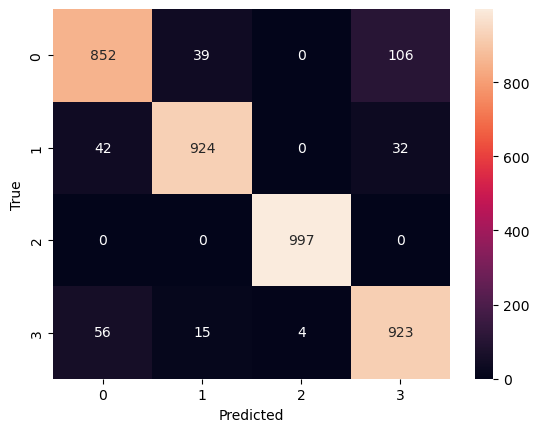

Epoch 1/35
1198/1198 [==============================] - 28s 17ms/step - loss: 0.5002 - accuracy: 0.7934 - val_loss: 0.2885 - val_accuracy: 0.8856
Epoch 2/35
1198/1198 [==============================] - 19s 16ms/step - loss: 0.2840 - accuracy: 0.8937 - val_loss: 0.2445 - val_accuracy: 0.9074
Epoch 3/35
1198/1198 [==============================] - 19s 16ms/step - loss: 0.2312 - accuracy: 0.9134 - val_loss: 0.2336 - val_accuracy: 0.9244
Epoch 4/35
1198/1198 [==============================] - 19s 16ms/step - loss: 0.2042 - accuracy: 0.9235 - val_loss: 0.2244 - val_accuracy: 0.9164
Epoch 5/35
1198/1198 [==============================] - 19s 16ms/step - loss: 0.1785 - accuracy: 0.9334 - val_loss: 0.2439 - val_accuracy: 0.9179
Epoch 6/35
1198/1198 [==============================] - 19s 16ms/step - loss: 0.1669 - accuracy: 0.9356 - val_loss: 0.2276 - val_accuracy: 0.9229
Epoch 7/35
1198/1198 [==============================] - 18s 15ms/step - loss: 0.1520 - accuracy: 0.9432 - val_loss: 0.2262 -

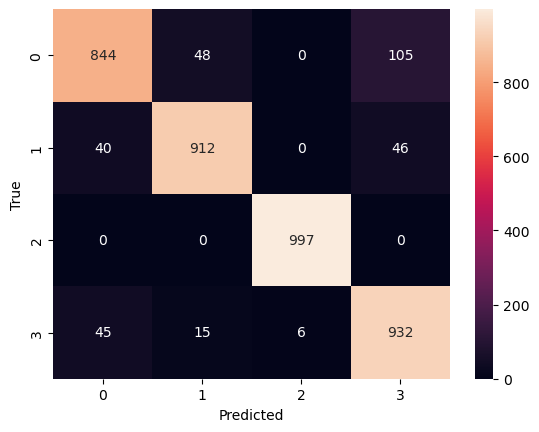

Epoch 1/35
1198/1198 [==============================] - 19s 10ms/step - loss: 0.6260 - accuracy: 0.7344 - val_loss: 0.3922 - val_accuracy: 0.8473
Epoch 2/35
1198/1198 [==============================] - 122s 102ms/step - loss: 0.4047 - accuracy: 0.8385 - val_loss: 0.3249 - val_accuracy: 0.8718
Epoch 3/35
1198/1198 [==============================] - 22s 19ms/step - loss: 0.3468 - accuracy: 0.8618 - val_loss: 0.2950 - val_accuracy: 0.8936
Epoch 4/35
1198/1198 [==============================] - 11s 9ms/step - loss: 0.3076 - accuracy: 0.8813 - val_loss: 0.2724 - val_accuracy: 0.9051
Epoch 5/35
1198/1198 [==============================] - 17s 14ms/step - loss: 0.2838 - accuracy: 0.8911 - val_loss: 0.2576 - val_accuracy: 0.9114
Epoch 6/35
1198/1198 [==============================] - 23s 19ms/step - loss: 0.2665 - accuracy: 0.8977 - val_loss: 0.2442 - val_accuracy: 0.9134
Epoch 7/35
1198/1198 [==============================] - 11s 9ms/step - loss: 0.2501 - accuracy: 0.9085 - val_loss: 0.2409 -

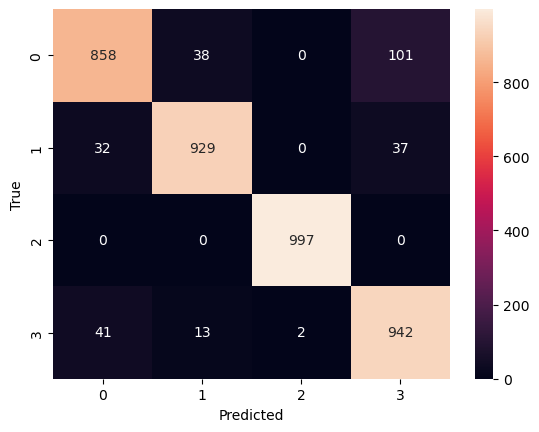

Epoch 1/35
1198/1198 [==============================] - 26s 15ms/step - loss: 0.6277 - accuracy: 0.7339 - val_loss: 0.4189 - val_accuracy: 0.8358
Epoch 2/35
1198/1198 [==============================] - 14s 12ms/step - loss: 0.4260 - accuracy: 0.8324 - val_loss: 0.3476 - val_accuracy: 0.8721
Epoch 3/35
1198/1198 [==============================] - 16s 13ms/step - loss: 0.3407 - accuracy: 0.8651 - val_loss: 0.2646 - val_accuracy: 0.9009
Epoch 4/35
1198/1198 [==============================] - 16s 14ms/step - loss: 0.3006 - accuracy: 0.8853 - val_loss: 0.2547 - val_accuracy: 0.9064
Epoch 5/35
1198/1198 [==============================] - 16s 13ms/step - loss: 0.2799 - accuracy: 0.8915 - val_loss: 0.2431 - val_accuracy: 0.9119
Epoch 6/35
1198/1198 [==============================] - 16s 14ms/step - loss: 0.2591 - accuracy: 0.9016 - val_loss: 0.2328 - val_accuracy: 0.9176
Epoch 7/35
1198/1198 [==============================] - 16s 14ms/step - loss: 0.2478 - accuracy: 0.9051 - val_loss: 0.2176 -

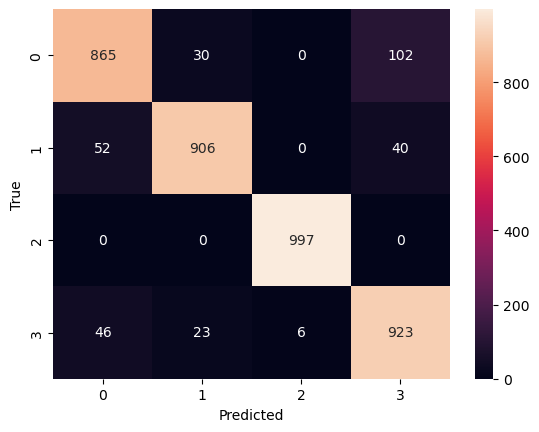

Epoch 1/35
1198/1198 [==============================] - 19s 11ms/step - loss: 0.5609 - accuracy: 0.7654 - val_loss: 0.3534 - val_accuracy: 0.8563
Epoch 2/35
1198/1198 [==============================] - 12s 10ms/step - loss: 0.3372 - accuracy: 0.8687 - val_loss: 0.2796 - val_accuracy: 0.9009
Epoch 3/35
1198/1198 [==============================] - 12s 10ms/step - loss: 0.2781 - accuracy: 0.8916 - val_loss: 0.2493 - val_accuracy: 0.9079
Epoch 4/35
1198/1198 [==============================] - 12s 10ms/step - loss: 0.2434 - accuracy: 0.9081 - val_loss: 0.2319 - val_accuracy: 0.9186
Epoch 5/35
1198/1198 [==============================] - 12s 10ms/step - loss: 0.2237 - accuracy: 0.9164 - val_loss: 0.2508 - val_accuracy: 0.9134
Epoch 6/35
1198/1198 [==============================] - 12s 10ms/step - loss: 0.2008 - accuracy: 0.9259 - val_loss: 0.2193 - val_accuracy: 0.9219
Epoch 7/35
1198/1198 [==============================] - 12s 10ms/step - loss: 0.1826 - accuracy: 0.9288 - val_loss: 0.2239 -

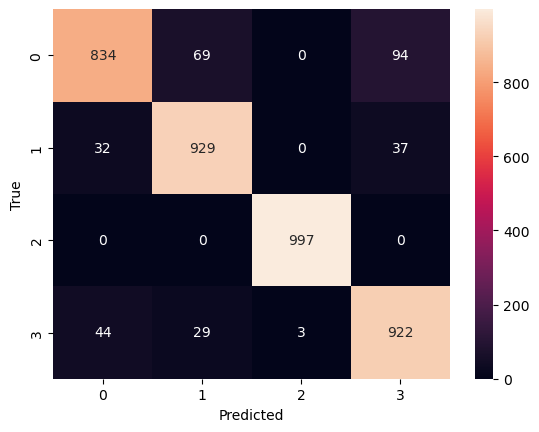

Epoch 1/35
1198/1198 [==============================] - 29s 19ms/step - loss: 0.5656 - accuracy: 0.7602 - val_loss: 0.3940 - val_accuracy: 0.8460
Epoch 2/35
1198/1198 [==============================] - 19s 16ms/step - loss: 0.3465 - accuracy: 0.8658 - val_loss: 0.2892 - val_accuracy: 0.8978
Epoch 3/35
1198/1198 [==============================] - 21s 18ms/step - loss: 0.2823 - accuracy: 0.8895 - val_loss: 0.2545 - val_accuracy: 0.9084
Epoch 4/35
1198/1198 [==============================] - 24s 20ms/step - loss: 0.2483 - accuracy: 0.9064 - val_loss: 0.2254 - val_accuracy: 0.9181
Epoch 5/35
1198/1198 [==============================] - 18s 15ms/step - loss: 0.2256 - accuracy: 0.9146 - val_loss: 0.2337 - val_accuracy: 0.9111
Epoch 6/35
1198/1198 [==============================] - 18s 15ms/step - loss: 0.2062 - accuracy: 0.9207 - val_loss: 0.2160 - val_accuracy: 0.9199
Epoch 7/35
1198/1198 [==============================] - 17s 14ms/step - loss: 0.1912 - accuracy: 0.9280 - val_loss: 0.2117 -

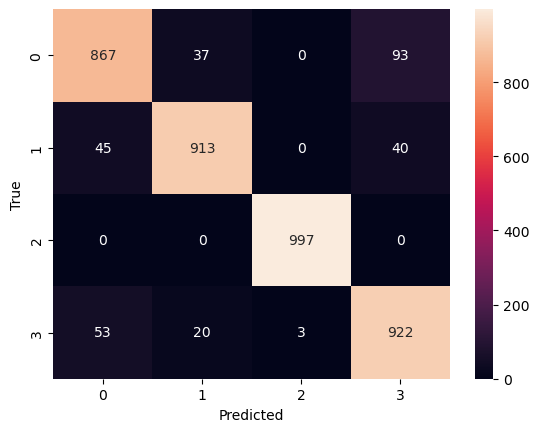

Epoch 1/35
1198/1198 [==============================] - 40s 26ms/step - loss: 0.5209 - accuracy: 0.7850 - val_loss: 0.3044 - val_accuracy: 0.8888
Epoch 2/35
1198/1198 [==============================] - 31s 26ms/step - loss: 0.2926 - accuracy: 0.8886 - val_loss: 0.2423 - val_accuracy: 0.9176
Epoch 3/35
1198/1198 [==============================] - 20s 17ms/step - loss: 0.2377 - accuracy: 0.9088 - val_loss: 0.2536 - val_accuracy: 0.9124
Epoch 4/35
1198/1198 [==============================] - 19s 16ms/step - loss: 0.1988 - accuracy: 0.9237 - val_loss: 0.2531 - val_accuracy: 0.9129
Epoch 5/35
1198/1198 [==============================] - 20s 17ms/step - loss: 0.1777 - accuracy: 0.9340 - val_loss: 0.1973 - val_accuracy: 0.9329
Epoch 6/35
1198/1198 [==============================] - 20s 17ms/step - loss: 0.1586 - accuracy: 0.9385 - val_loss: 0.1943 - val_accuracy: 0.9342
Epoch 7/35
1198/1198 [==============================] - 20s 16ms/step - loss: 0.1467 - accuracy: 0.9443 - val_loss: 0.2118 -

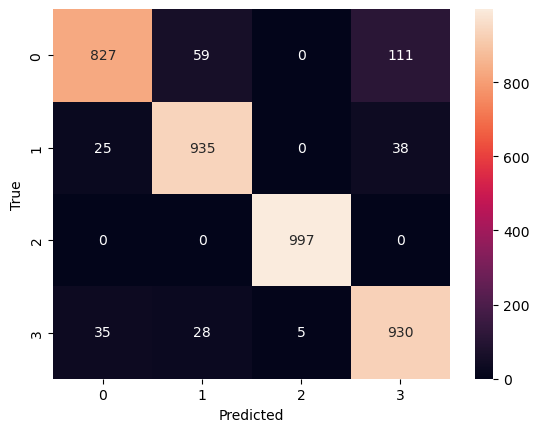

Epoch 1/35
1198/1198 [==============================] - 37s 21ms/step - loss: 0.5112 - accuracy: 0.7912 - val_loss: 0.2975 - val_accuracy: 0.8808
Epoch 2/35
1198/1198 [==============================] - 25s 20ms/step - loss: 0.2916 - accuracy: 0.8880 - val_loss: 0.2401 - val_accuracy: 0.9151
Epoch 3/35
1198/1198 [==============================] - 25s 21ms/step - loss: 0.2300 - accuracy: 0.9119 - val_loss: 0.2433 - val_accuracy: 0.9109
Epoch 4/35
1198/1198 [==============================] - 29s 24ms/step - loss: 0.2014 - accuracy: 0.9242 - val_loss: 0.2216 - val_accuracy: 0.9161
Epoch 5/35
1198/1198 [==============================] - 25s 21ms/step - loss: 0.1802 - accuracy: 0.9310 - val_loss: 0.2155 - val_accuracy: 0.9254
Epoch 6/35
1198/1198 [==============================] - 27s 23ms/step - loss: 0.1645 - accuracy: 0.9402 - val_loss: 0.2075 - val_accuracy: 0.9316
Epoch 7/35
1198/1198 [==============================] - 25s 21ms/step - loss: 0.1489 - accuracy: 0.9425 - val_loss: 0.2442 -

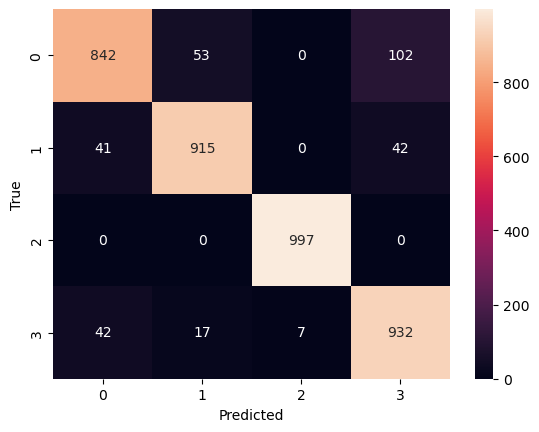

In [27]:
best_accuracy = 0.0
best_model = None

# Experiment with different window lengths and number of neurons/layers
window_lengths = [2, 4, 6]  # Example window sizes
num_neurons_list = [32, 64, 128]  # Different neuron sizes
num_layers_list = [1, 2]  # Different number of layers

for window_length in window_lengths:
    # Adjust window length based on the feature size
    window_length = adjust_window_length(X_train, window_length)

    # Ensure the reshaping can happen correctly
    X_train_reshaped = X_train.reshape(
        X_train.shape[0], window_length, X_train.shape[1] // window_length
    )
    X_valid_reshaped = X_valid.reshape(
        X_valid.shape[0], window_length, X_valid.shape[1] // window_length
    )
    X_test_reshaped = X_test.reshape(
        X_test.shape[0], window_length, X_test.shape[1] // window_length
    )

    for num_neurons in num_neurons_list:
        for num_layers in num_layers_list:
            model = build_gru_model(
                num_neurons, num_layers, (window_length, X_train_reshaped.shape[2])
            )

            # Fit the model
            model.fit(
                X_train_reshaped,
                encoded_y_train,
                epochs=35,
                batch_size=10,
                validation_data=(X_valid_reshaped, encoded_y_valid),
            )

            # Evaluate the model
            _, accuracy = model.evaluate(X_valid_reshaped, encoded_y_valid)
            print(
                f"Window: {window_length}, Neurons: {num_neurons}, Layers: {num_layers}, Validation Accuracy: {accuracy:.2f}"
            )

            # Check if this is the best model
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model
                # Save the best model
                model.save("best_gru_model.h5")

            # Predict the test data
            y_pred = model.predict(X_test_reshaped)
            y_pred = np.argmax(y_pred, axis=1)

            # Create confusion matrix
            cm = confusion_matrix(encoded_y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt="g")
            plt.xlabel("Predicted")
            plt.ylabel("True")
            plt.show()

# Load the best model for later use
best_model = load_model("best_gru_model.h5")
print(f"Best model validation accuracy: {best_accuracy:.2f}")

In [28]:
# Load new 1-minute data for prediction


def combine_pickles_with_class(path, class_name):
    # Initialize lists to hold acc and gyro files
    acc_files = []
    gyro_files = []

    # List all files in the directory
    for file in os.listdir(path):
        if file.startswith(class_name) and file.endswith("_acc.pkl"):
            acc_files.append(file)
        elif file.startswith(class_name) and file.endswith("_gyro.pkl"):
            gyro_files.append(file)

    # Create a list to hold the combined data for all the files
    combined_data_list = []

    # Rename columns appropriately for acc and gyro DataFrames
    for i in range(len(acc_files)):
        acc_df = pd.read_pickle(path + acc_files[i])
        gyro_df = pd.read_pickle(path + gyro_files[i])

        # Drop the first column (assumed to be an index or unneeded)

        # if num of columns is 4, then drop the first column
        if len(acc_df.columns) == 4:
            acc_df.drop(acc_df.columns[0], axis=1, inplace=True)
            gyro_df.drop(gyro_df.columns[0], axis=1, inplace=True)

        # Rename columns
        acc_df.columns = ["ax", "ay", "az"]
        gyro_df.columns = ["gx", "gy", "gz"]

        # Combine acc and gyro DataFrames horizontally
        combined_df = pd.concat([acc_df, gyro_df], axis=1)

        # # Add class column
        # combined_df["class"] = class_name

        # # Append the combined DataFrame to the list
        combined_data_list.append(combined_df)

    # Concatenate all DataFrames vertically to get the final combined DataFrame
    final_df = pd.concat(combined_data_list, ignore_index=True)

    return final_df


# test the function

In [29]:
new_data = combine_pickles_with_class("newdata/", "data")


new_data_scaled = scaler.transform(new_data)  # Apply same scaling
new_data_reshaped = new_data_scaled.reshape(
    new_data_scaled.shape[0], window_length, new_data_scaled.shape[1] // window_length
)
# Predict on the new data
new_pred = model.predict(new_data_reshaped)

new_pred_classes = np.argmax(new_pred, axis=1)

250/250 [==============================] - 4s 16ms/step


In [35]:
new_pred.shape

(7981, 4)

In [30]:
new_data.head()

,ax,ay,az,gx,gy,gz
0,3.950734,9.491013,0.552351,-0.425043,0.388124,0.519434
1,3.212619,9.993668,0.108075,-0.357386,0.326105,0.766726
2,2.621648,10.544523,0.529000,-0.235880,0.480572,1.073316
3,2.145039,11.045531,1.254990,-0.128082,0.858053,1.413990
4,1.873654,11.362272,1.586401,-0.078937,1.375765,1.791496


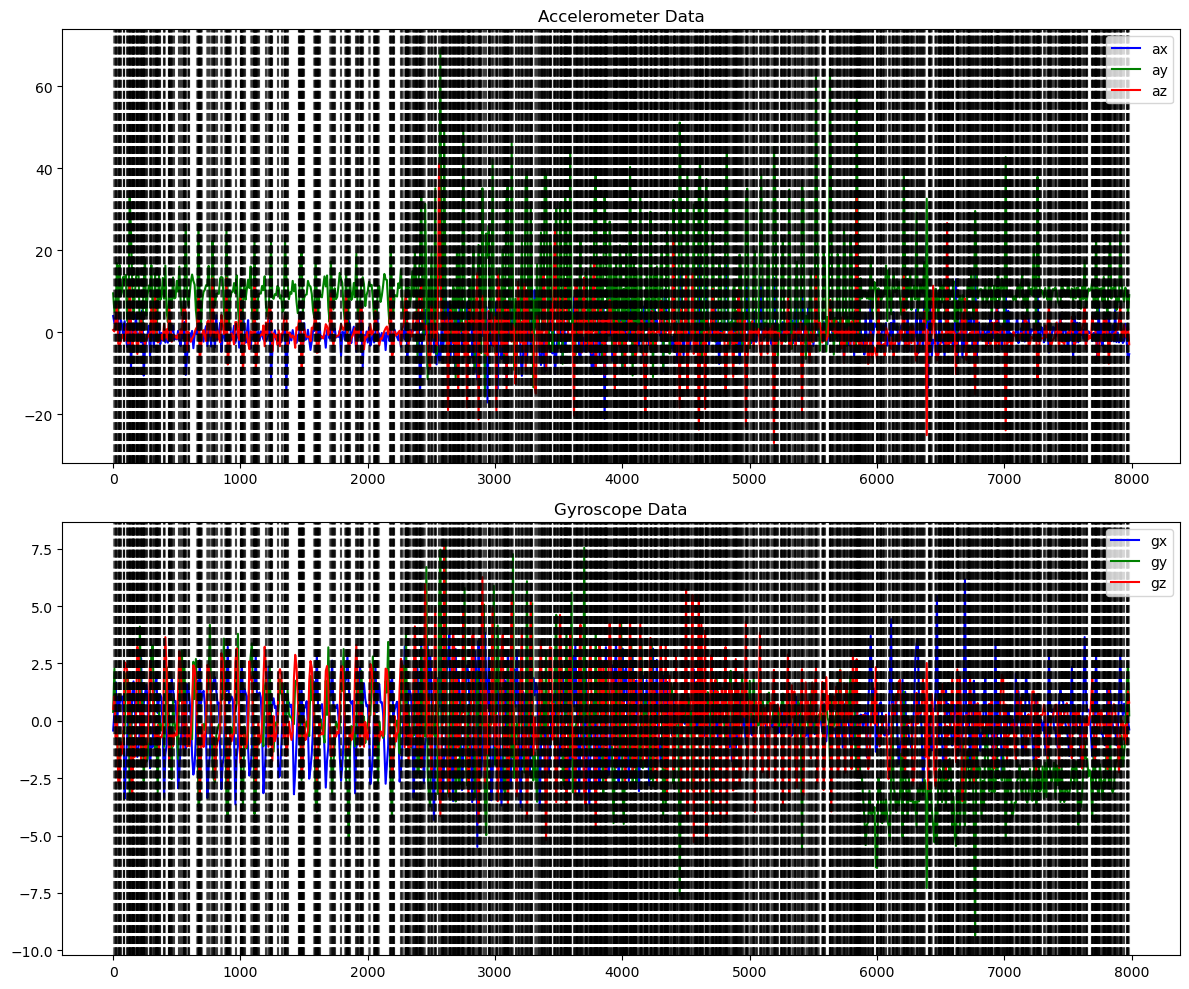

In [31]:
# Calculate class changes to reduce marker clutter
class_changes = [
    i
    for i in range(1, len(new_pred_classes))
    if new_pred_classes[i - 1] != new_pred_classes[i]
]

# Plot the data with reduced markers and increased line width
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Accelerometer Data Plot
for axis, color in zip(["ax", "ay", "az"], ["b", "g", "r"]):
    ax[0].plot(
        new_data.index[::10],
        new_data[axis][::10],
        label=axis,
        color=color,
        linewidth=1.5,
    )  # Plot every 10th point
ax[0].set_title("Accelerometer Data")
ax[0].legend(loc="upper right")

# Gyroscope Data Plot
for axis, color in zip(["gx", "gy", "gz"], ["b", "g", "r"]):
    ax[1].plot(
        new_data.index[::10],
        new_data[axis][::10],
        label=axis,
        color=color,
        linewidth=1.5,
    )  # Plot every 10th point
ax[1].set_title("Gyroscope Data")
ax[1].legend(loc="upper right")

# Adding vertical lines only at points of class change
for change_index in class_changes:
    ax[0].axvline(x=new_data.index[change_index], color="k", linestyle="--", alpha=0.5)
    ax[1].axvline(x=new_data.index[change_index], color="k", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [32]:
def summarize_classifications(predictions):
    start_index = 0
    current_class = predictions[0]
    results = []

    for i in range(1, len(predictions)):
        if predictions[i] != current_class:
            results.append(f"Indices {start_index}-{i - 1}: Class {current_class}")
            start_index = i
            current_class = predictions[i]

    # Don't forget to append the last range
    if start_index < len(predictions):
        results.append(
            f"Indices {start_index}-{len(predictions) - 1}: Class {current_class}"
        )

    return results


# Applying the function to the predictions
classification_summary = summarize_classifications(new_pred_classes)
for line in classification_summary:
    print(line)

Indices 0-2: Class 0
Indices 3-17: Class 3
Indices 18-18: Class 0
Indices 19-22: Class 3
Indices 23-24: Class 0
Indices 25-29: Class 1
Indices 30-38: Class 3
Indices 39-43: Class 1
Indices 44-45: Class 3
Indices 46-46: Class 1
Indices 47-49: Class 3
Indices 50-51: Class 1
Indices 52-62: Class 3
Indices 63-64: Class 1
Indices 65-82: Class 3
Indices 83-83: Class 0
Indices 84-85: Class 1
Indices 86-87: Class 0
Indices 88-109: Class 3
Indices 110-111: Class 0
Indices 112-112: Class 3
Indices 113-116: Class 0
Indices 117-121: Class 3
Indices 122-123: Class 0
Indices 124-129: Class 1
Indices 130-131: Class 0
Indices 132-133: Class 3
Indices 134-135: Class 0
Indices 136-141: Class 1
Indices 142-145: Class 3
Indices 146-146: Class 1
Indices 147-150: Class 3
Indices 151-151: Class 1
Indices 152-152: Class 3
Indices 153-155: Class 0
Indices 156-158: Class 3
Indices 159-159: Class 1
Indices 160-160: Class 0
Indices 161-161: Class 3
Indices 162-164: Class 0
Indices 165-166: Class 1
Indices 167-176

In [36]:
classification_summary = summarize_classifications(y_pred)
for line in classification_summary:
    print(line)

Indices 0-4: Class 3
Indices 5-31: Class 0
Indices 32-32: Class 3
Indices 33-46: Class 0
Indices 47-47: Class 1
Indices 48-52: Class 0
Indices 53-58: Class 3
Indices 59-89: Class 0
Indices 90-91: Class 3
Indices 92-102: Class 0
Indices 103-103: Class 1
Indices 104-108: Class 0
Indices 109-109: Class 1
Indices 110-115: Class 3
Indices 116-144: Class 0
Indices 145-147: Class 3
Indices 148-164: Class 0
Indices 165-170: Class 3
Indices 171-200: Class 0
Indices 201-202: Class 3
Indices 203-206: Class 0
Indices 207-207: Class 1
Indices 208-220: Class 0
Indices 221-224: Class 3
Indices 225-226: Class 1
Indices 227-248: Class 0
Indices 249-250: Class 3
Indices 251-259: Class 0
Indices 260-261: Class 3
Indices 262-268: Class 0
Indices 269-271: Class 1
Indices 272-280: Class 0
Indices 281-282: Class 3
Indices 283-317: Class 0
Indices 318-318: Class 3
Indices 319-335: Class 0
Indices 336-336: Class 1
Indices 337-338: Class 3
Indices 339-374: Class 0
Indices 375-375: Class 3
Indices 376-384: Class